## 1. Project Introduction
The project aims to investigate the factors influencing thyroid disorders by analyzing a dataset of clinical and demographic features. By leveraging advanced statistical and machine learning methods, the project seeks to develop predictive models that accurately assess the risk of thyroid disorders in individuals.

## 2. Importance of the Topic
Thyroid disorders are prevalent globally and can lead to severe health complications if not diagnosed and treated early. In the fields of healthcare and medical informatics, early detection and risk stratification of thyroid disorders are critical for improving patient outcomes and optimizing healthcare resources. This project contributes to these fields by providing data-driven insights and tools for early risk assessment.

## 3. Problem Statement
Despite advances in medical diagnostics, there remains a gap in utilizing data-driven approaches for predicting thyroid disorders. Existing research primarily focuses on clinical evaluations and biochemical tests. This project addresses this gap by developing robust statistical models and machine learning algorithms to predict thyroid risk levels using a comprehensive dataset.

## 4. Objectives

### Main Objective
- To develop and validate predictive models for assessing thyroid disorder risk using demographic and clinical features, identifying the most significant predictors and evaluating the performance of various machine learning algorithms.

### Additional Objectives
1. To analyze the interaction between multiple comorbidities, such as fatigue and weight change, and their combined effect on thyroid disorder risk levels.
2. To investigate the temporal patterns and trends in the progression of thyroid risk levels, and to analyze how these patterns vary across different age groups and genders.
3. To study the joint impact of pregnancy and family history of thyroid disorders on the likelihood of developing thyroid-related symptoms, providing insights into their combined influence.
4. To examine the role of psychosocial factors, such as depression or anxiety, in the manifestation and risk assessment of thyroid disorders, and to explore the integration of these factors into predictive models.
5. To quantitatively analyze the physiological mechanisms linking muscle weakness and heart rate changes to thyroid risk, providing a deeper understanding of these connections.
6. To assess the effectiveness of feature engineering techniques in improving the accuracy and interpretability of predictive models for thyroid risk assessment, identifying the best practices for feature transformation and selection.

## 5. Research Questions
- What is the predictive power of demographic and clinical features in determining the thyroid risk level, and which features are the most significant predictors?
- How does the presence of multiple comorbidities, such as fatigue and weight change, interact to influence the risk level of thyroid disorders?
- Can machine learning models accurately distinguish between moderate and high thyroid risk levels based on the provided features, and what is the performance of different algorithms?
- What are the temporal patterns and trends in the progression of thyroid risk levels, and how do they vary across different age groups and genders?
- How do pregnancy and family history of thyroid disorders jointly affect the likelihood of developing thyroid-related symptoms?
- What role do psychosocial factors, such as depression or anxiety, play in the manifestation and risk assessment of thyroid disorders, and can they be integrated into predictive models?
- What are the underlying physiological mechanisms linking muscle weakness and heart rate changes to thyroid risk, and how can these mechanisms be quantitatively analyzed?
- How effective are feature engineering techniques in improving the accuracy and interpretability of predictive models for thyroid risk assessment?
- Can advanced clustering methods identify subgroups within the dataset that share similar thyroid risk profiles, and what are the clinical implications of these subgroups?
- How can we develop a robust clinical decision support system for thyroid risk assessment that integrates machine learning predictions with real-time patient data and feedback from healthcare professionals?

## 7. Stakeholders
- **Healthcare Providers:** Endocrinologists and general practitioners who diagnose and treat thyroid disorders.
- **Researchers:** Medical researchers and data scientists focused on endocrinology and predictive modeling.
- **Patients:** Individuals at risk of thyroid disorders who would benefit from early detection and intervention.
- **Healthcare Organizations:** Hospitals, clinics, and public health departments interested in improving thyroid disorder management.

## 8. Data Understanding
The dataset structure includes various clinical and demographic features. The **Age** of the individual is recorded in years, while **Gender** is denoted as 1 for male and 0 for female. **Pregnancy** status is indicated by 1 if pregnant and 0 otherwise. The presence of a **Family History of Thyroid** disorders is noted with 1 for yes and 0 for no. The presence of **Goiter** is also marked as 1 for yes and 0 for no. **Fatigue** symptoms are recorded similarly with 1 for yes and 0 for no, as is the history of **Weight Change**. The dataset includes **Hair Loss** presence (1 for yes, 0 for no) and **Heart Rate Changes** (1 for yes, 0 for no). Sensitivity to cold or heat (**Sensitivity to Cold or Heat**) is also noted with 1 for yes and 0 for no. **Increased Sweating** is recorded with the same binary notation. **Muscle Weakness**, **Constipation or More Bowel Movements**, and the presence of **Depression or Anxiety** are all indicated by 1 for yes and 0 for no. The dataset further records **Difficulty Concentrating or Memory Problems** with 1 for yes and 0 for no, as well as the presence of **Dry or Itchy Skin**. Finally, the **Thyroid Risk Level** is classified as 0 for no risk, 1 for moderate risk, and 2 for high risk.

**Dataset Format**
- Provided in a tabular format with binary (0/1) and integer values.
- Each row represents an individual patient record.
- The target variable is Thyroid_Risk_Level, suitable for classification tasks.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("Data/Thyroid_Dataset_Resampled.csv")

In [3]:
df.shape

(10506, 17)

There are 10,506 rows and 17 columns

In [4]:
df.head(5)

,Age,Gender,Pregnancy,Family_History_of_Thyroid,Goiter,Fatigue,Weight_Change,Hair_Loss,Heart_Rate_Changes,Sensitivity_to_Cold_or_Heat,Increased_Sweating,Muscle_Weakness,Constipation_or_More_Bowel_Movements,Depression_or_Anxiety,Difficulty_Concentrating_or_Memory_Problems,Dry_or_Itchy_Skin,Thyroid_Risk_Level
0,81,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,2
1,18,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1
2,87,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,2
3,27,1,0,0,1,0,1,1,1,1,1,0,0,1,1,0,2
4,49,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1


Column Structure
- Age: Age of the individual (in years).
- Gender: Gender of the individual (1 for male, 0 for female).
- Pregnancy: Pregnancy status (1 if pregnant, 0 otherwise).
- Family_History_of_Thyroid: Indicates family history of thyroid disorders (1 for yes, 0 for no).
- Goiter: Presence of goiter (1 for yes, 0 for no).
- Fatigue: Presence of fatigue symptoms (1 for yes, 0 for no).
- Weight_Change: History of weight changes (1 for yes, 0 for no).
- Hair_Loss: Presence of hair loss (1 for yes, 0 for no).
- Heart_Rate_Changes: Changes in heart rate (1 for yes, 0 for no).
- Sensitivity_to_Cold_or_Heat: Sensitivity to cold or heat (1 for yes, 0 for no).
- Increased_Sweating: Increased sweating (1 for yes, 0 for no).
- Muscle_Weakness: Presence of muscle weakness (1 for yes, 0 for no).
- Constipation_or_More_Bowel_Movements: Changes in bowel movement patterns (1 for yes, 0 for no).
- Depression_or_Anxiety: Presence of depression or anxiety (1 for yes, 0 for no).
- Difficulty_Concentrating_or_Memory_Problems: Difficulty concentrating or memory problems (1 for yes, 0 for no).
- Dry_or_Itchy_Skin: Presence of dry or itchy skin (1 for yes, 0 for no).
- Thyroid_Risk_Level: Risk level of thyroid disorders (0: No risk, 1: Moderate risk, 2: High risk).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Age                                          10506 non-null  int64
 1   Gender                                       10506 non-null  int64
 2   Pregnancy                                    10506 non-null  int64
 3   Family_History_of_Thyroid                    10506 non-null  int64
 4   Goiter                                       10506 non-null  int64
 5   Fatigue                                      10506 non-null  int64
 6   Weight_Change                                10506 non-null  int64
 7   Hair_Loss                                    10506 non-null  int64
 8   Heart_Rate_Changes                           10506 non-null  int64
 9   Sensitivity_to_Cold_or_Heat                  10506 non-null  int64
 10  Increased_Sweating    

All the 17 columns are of integer data type.

There isn't any column that contains missing values.

## Exploratory Data Analysis (EDA)

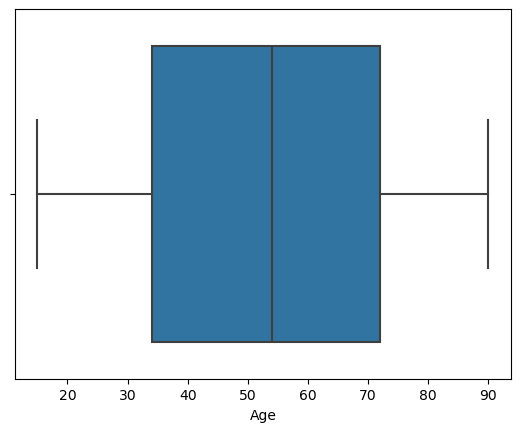

In [6]:
sns.boxplot(x=df['Age'])
plt.show()

In [7]:
# Rename columns
newColName = {
    'Family_History_of_Thyroid' : 'Family_Thyroid_History',
    'Sensitivity_to_Cold_or_Heat' : 'Sensitivity_temp',
    'Constipation_or_More_Bowel_Movements': 'Bowel_Movement_Changes',
    'Depression_or_Anxiety': 'Depression_Anxiety',
    'Difficulty_Concentrating_or_Memory_Problems': 'Concentration_Memory_Issues',
    'Dry_or_Itchy_Skin': 'Dry_Itchy_Skin',
}

df = df.rename(columns=newColName)

In [8]:
start_col = "Gender"
start_index = df.columns.get_loc(start_col)

for col in df.columns[start_index:]:
    count = df[col].value_counts()
    print(count)

Gender
0    5345
1    5161
Name: count, dtype: int64
Pregnancy
0    7979
1    2527
Name: count, dtype: int64
Family_Thyroid_History
0    5453
1    5053
Name: count, dtype: int64
Goiter
0    7273
1    3233
Name: count, dtype: int64
Fatigue
0    6328
1    4178
Name: count, dtype: int64
Weight_Change
0    6352
1    4154
Name: count, dtype: int64
Hair_Loss
0    6406
1    4100
Name: count, dtype: int64
Heart_Rate_Changes
0    6364
1    4142
Name: count, dtype: int64
Sensitivity_temp
0    6406
1    4100
Name: count, dtype: int64
Increased_Sweating
0    6403
1    4103
Name: count, dtype: int64
Muscle_Weakness
0    6388
1    4118
Name: count, dtype: int64
Bowel_Movement_Changes
0    6267
1    4239
Name: count, dtype: int64
Depression_Anxiety
0    6404
1    4102
Name: count, dtype: int64
Concentration_Memory_Issues
0    6355
1    4151
Name: count, dtype: int64
Dry_Itchy_Skin
0    6421
1    4085
Name: count, dtype: int64
Thyroid_Risk_Level
2    3502
1    3502
0    3502
Name: count, dtype: int64


In [9]:
# Create Age bins
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Value Counts for each age groups
df['Age_Group'].value_counts().sort_index()

Age_Group
11-20      657
21-30     1238
31-40     1398
41-50     1321
51-60     1479
61-70     1410
71-80     1452
81-90     1411
91-100     140
Name: count, dtype: int64

### Univariate Analysis

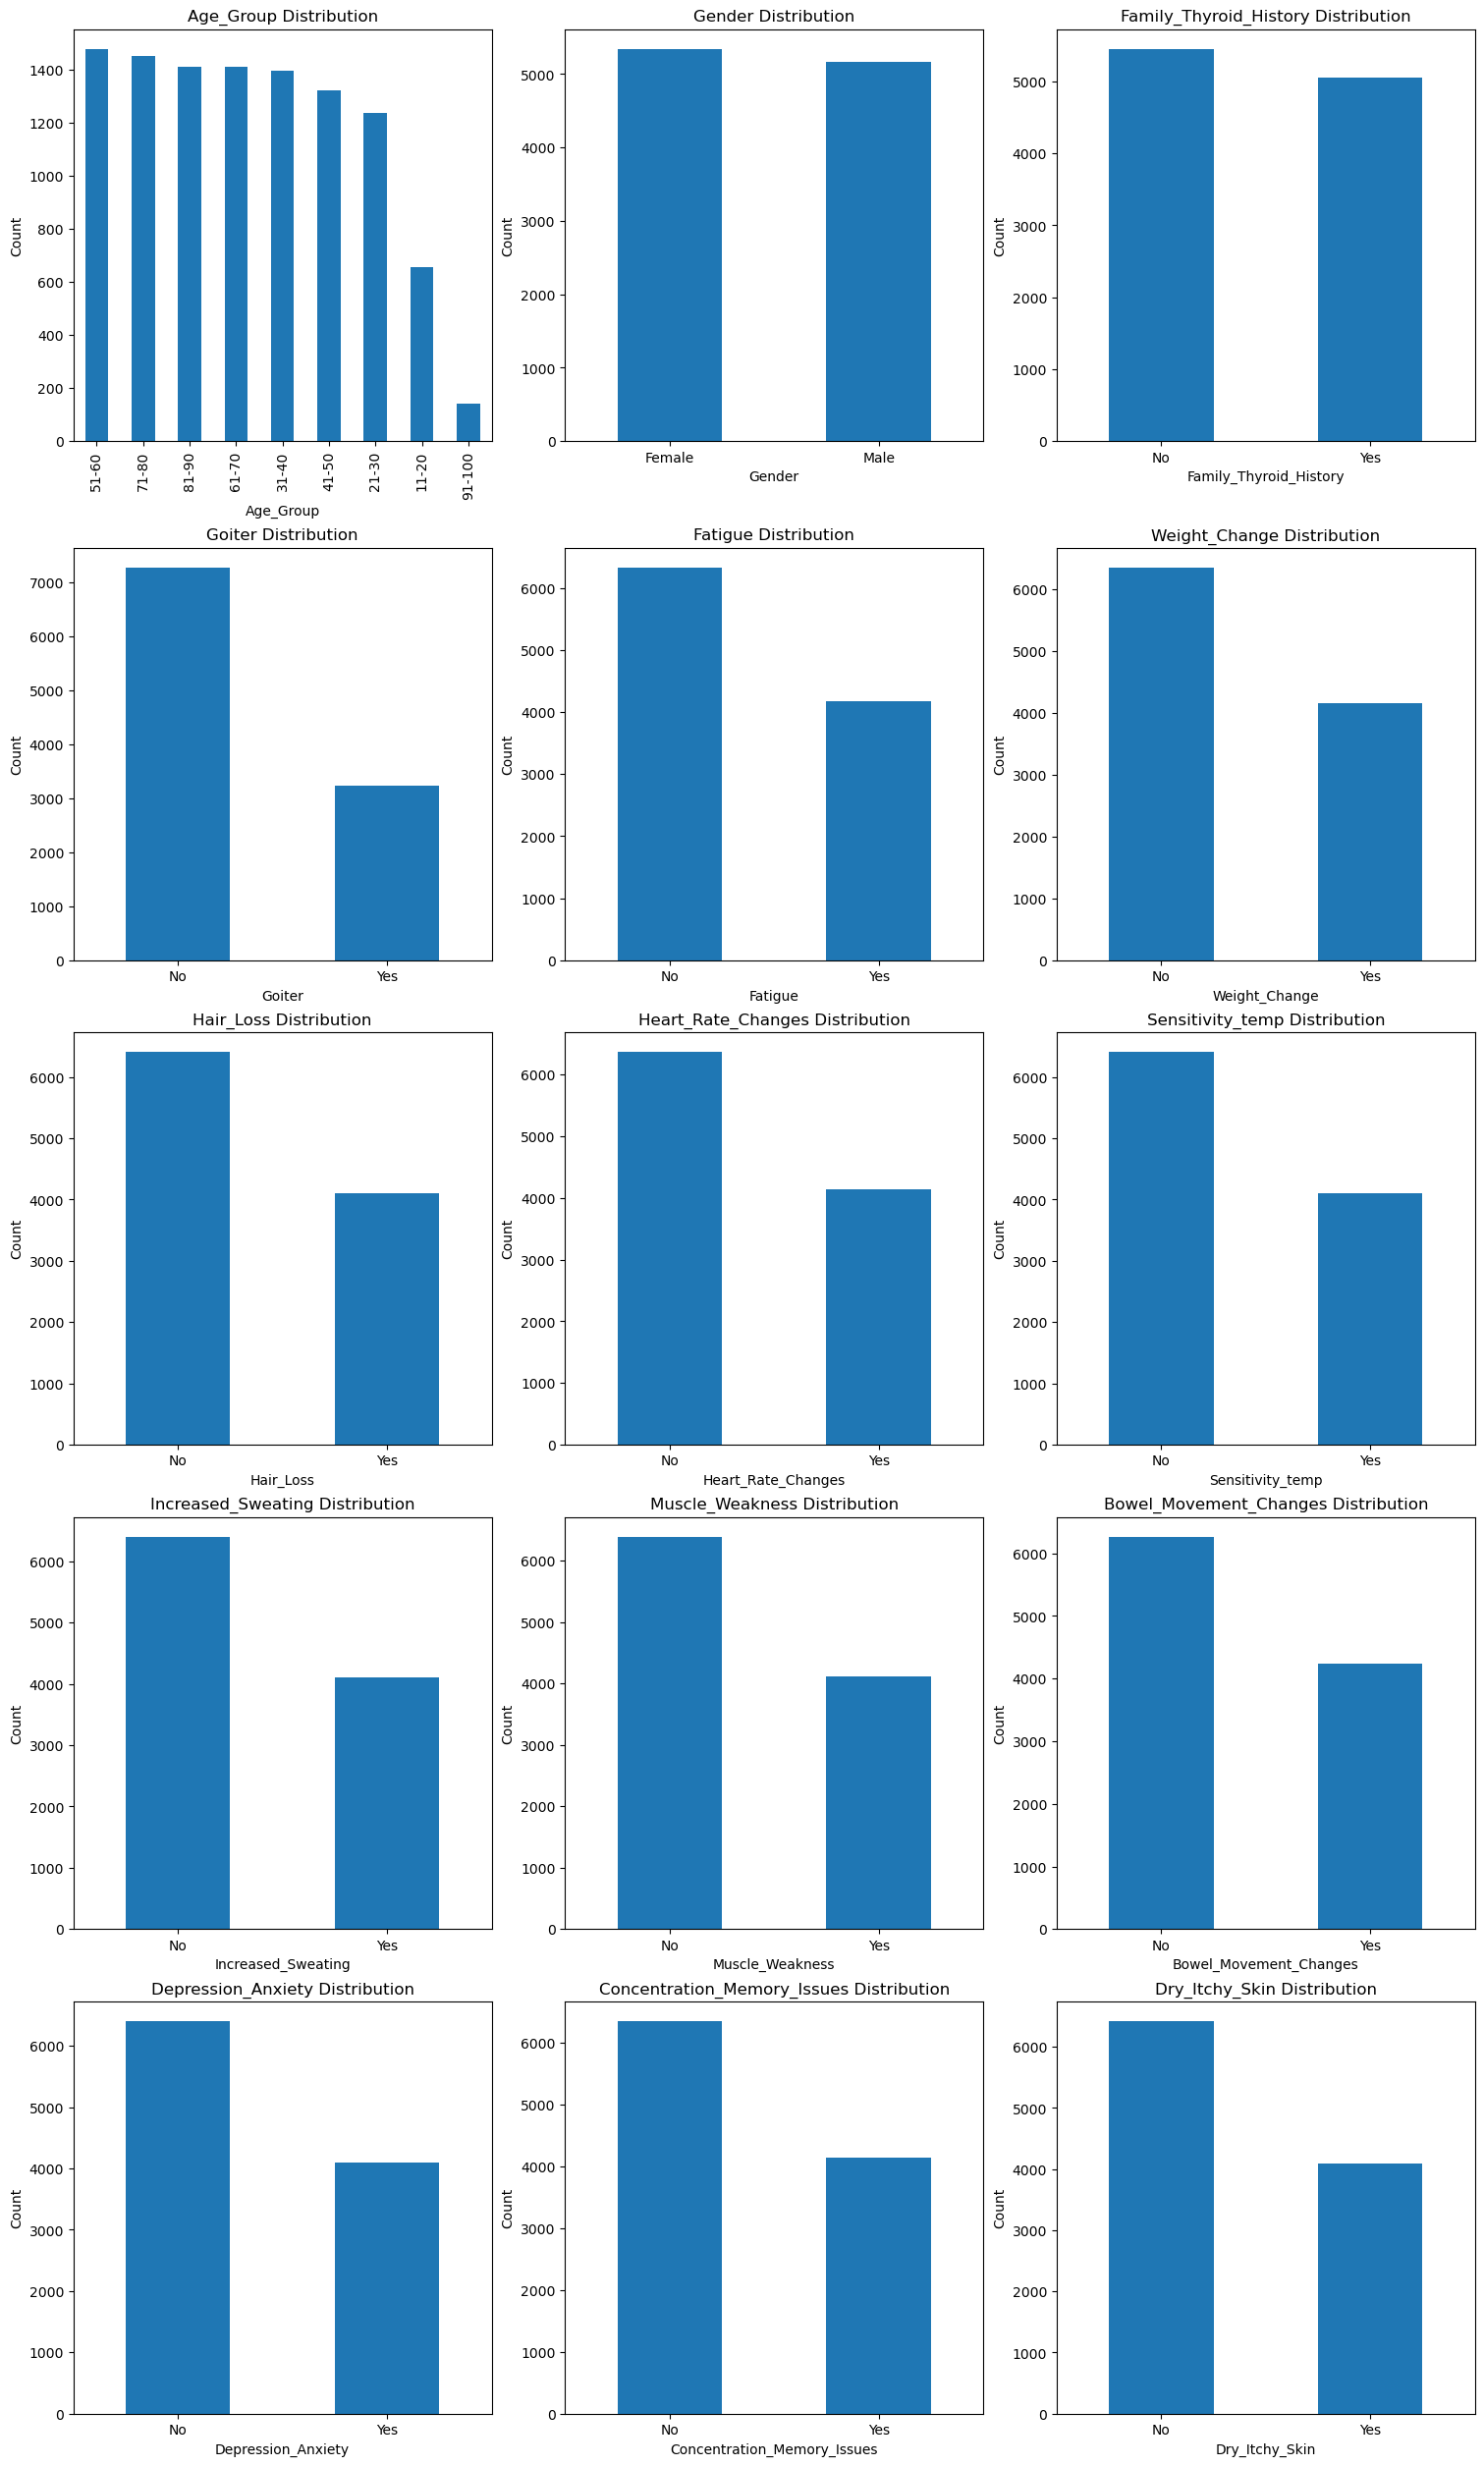

In [10]:
def value_count_dist_matrix(cols, labels=None):
    # Number of rows and columns for the grid layout
    num_cols = 3
    # Ensures enough rows for all columns
    num_rows = (len(cols) + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows), constrained_layout=True)
    # Flatten the array of axes for easier indexing
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        # Value count of the specified column
        col_count = df[col].value_counts()
        
        # Plot
        col_count.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(f'{col}')
        axes[i].set_ylabel('Count')
        if labels and col in labels:
            axes[i].set_xticks([0, 1])
            axes[i].set_xticklabels(labels[col], rotation=0)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

# Define columns to plot and their labels
cols = ['Age_Group', 'Gender', 'Family_Thyroid_History', 'Goiter', 
        'Fatigue', 'Weight_Change', 'Hair_Loss', 'Heart_Rate_Changes', 
        'Sensitivity_temp', 'Increased_Sweating', 'Muscle_Weakness', 
        'Bowel_Movement_Changes', 'Depression_Anxiety', 'Concentration_Memory_Issues',
        'Dry_Itchy_Skin'
       ]
labels = {
    'Gender': ['Female', 'Male'],
    'Family_Thyroid_History': ['No', 'Yes'],
    'Goiter': ['No', 'Yes'],
    'Fatigue': ['No', 'Yes'],
    'Weight_Change': ['No', 'Yes'],
    'Hair_Loss': ['No', 'Yes'],
    'Heart_Rate_Changes': ['No', 'Yes'],
    'Sensitivity_temp': ['No', 'Yes'],
    'Increased_Sweating': ['No', 'Yes'],
    'Muscle_Weakness': ['No', 'Yes'],
    'Bowel_Movement_Changes':['No', 'Yes'],
    'Depression_Anxiety': ['No', 'Yes'],
    'Concentration_Memory_Issues':['No', 'Yes'],
    'Dry_Itchy_Skin': ['No', 'Yes']
}

# Plot the value counts in a matrix layout
value_count_dist_matrix(cols, labels)

#### Age Distribution by Gender

In [18]:
# Mean age for each gender group
mean_age = df.groupby('Gender')['Age'].mean()

# Mode age for each gender group
mode_age = df.groupby('Gender')['Age'].apply(lambda x: x.mode().iloc[0])

# Median age for each gender group
median_age = df.groupby('Gender')['Age'].median()

# Print the mean, mode, and median ages
print("Mean age by gender (0 is Female, 1 is Male):", mean_age)
print("\nMode age by gender (0 is Female, 1 is Male):", mode_age)
print("\nMedian age by gender (0 is Female, 1 is Male):", median_age)

Mean age by gender (0 is Female, 1 is Male): Gender
0    53.511880
1    53.015113
Name: Age, dtype: float64

Mode age by gender (0 is Female, 1 is Male): Gender
0    80
1    73
Name: Age, dtype: int64

Median age by gender (0 is Female, 1 is Male): Gender
0    54.0
1    53.0
Name: Age, dtype: float64


#### Pregnancy Distribution among Females

Pregnancy Distribution: 0 is Not Pregnant and 1 is Pregnant Pregnancy
0    2818
1    2527
Name: count, dtype: int64


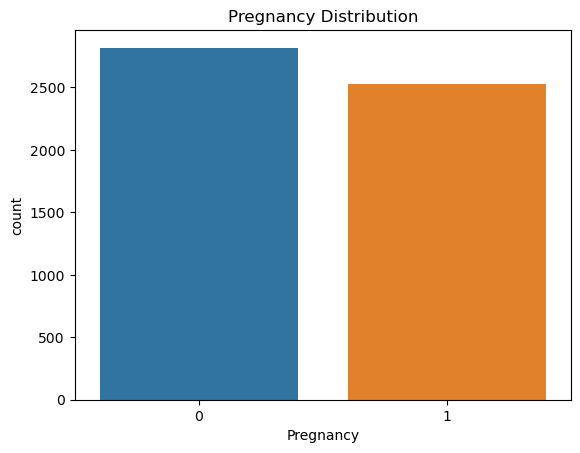

In [40]:
pregnancy_dist = df[(df['Gender'] == 0)]['Pregnancy'].value_counts()
print("Pregnancy Distribution: 0 is Not Pregnant and 1 is Pregnant", pregnancy_dist)

sns.countplot(x='Pregnancy', data=df[df['Gender']==0])
plt.title("Pregnancy Distribution")
plt.show()

In [ ]:
There are 2527 pregnant women and 

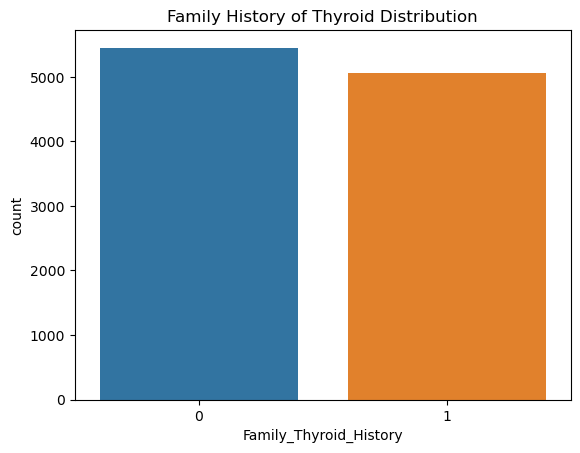

In [13]:
sns.countplot(x='Family_Thyroid_History', data=df)
plt.title("Family History of Thyroid Distribution")
plt.show()

### Bivariate Analysis

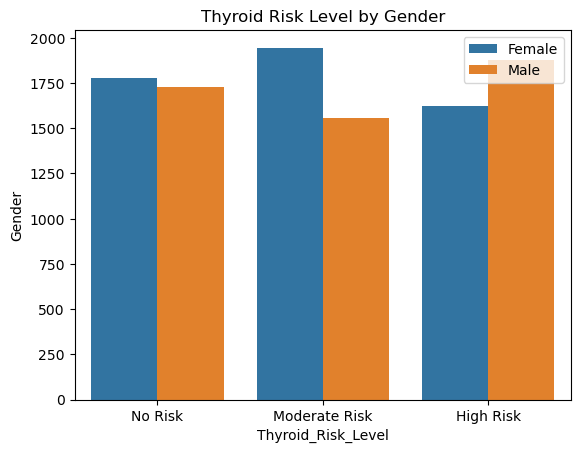

In [14]:
def thyroidRiskLevel(col, label, df):
    ax = sns.countplot(x="Thyroid_Risk_Level", hue=col, data=df)
    ax.set_xticklabels(["No Risk", "Moderate Risk", "High Risk"])
    plt.ylabel(f"{col}")
    plt.title(f"Thyroid Risk Level by {col}")
    plt.legend(labels=label)
    plt.show()

thyroidRiskLevel('Gender', ['Female', 'Male'], df)

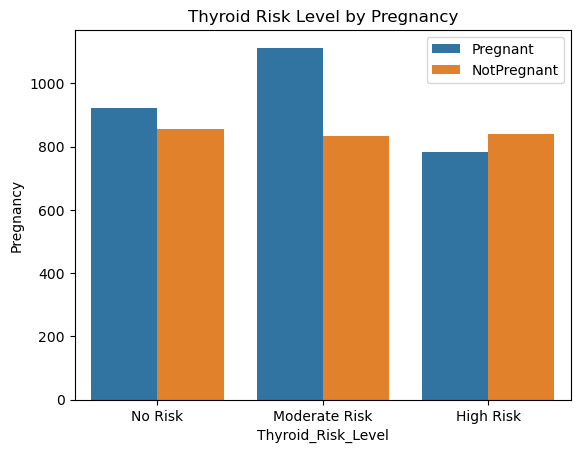

In [15]:
thyroidRiskLevel('Pregnancy', ['Pregnant', 'NotPregnant'], df[df["Gender"] == 0])

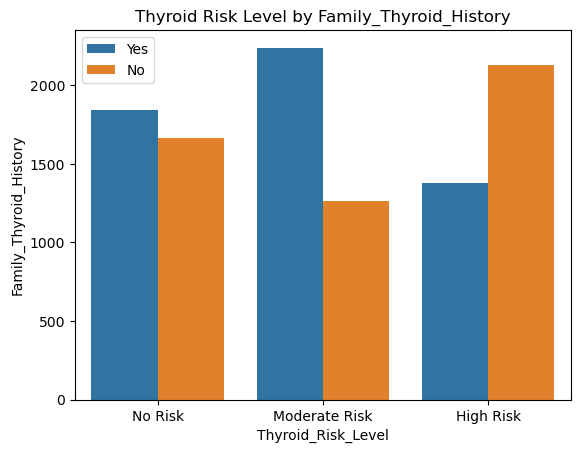

In [16]:
thyroidRiskLevel('Family_Thyroid_History', ['Yes', 'No'], df)

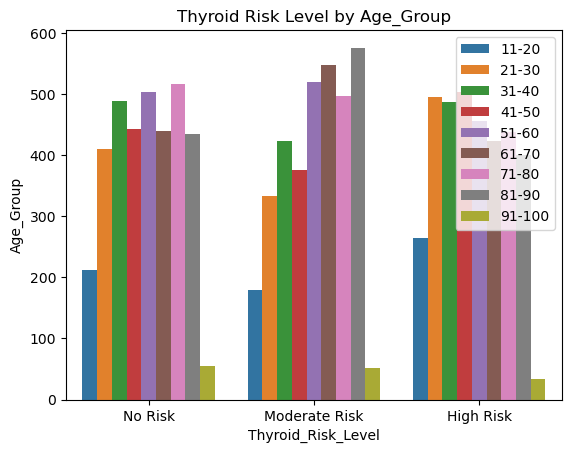

In [17]:
thyroidRiskLevel('Age_Group', ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'], df)

### Multivariate Analysis

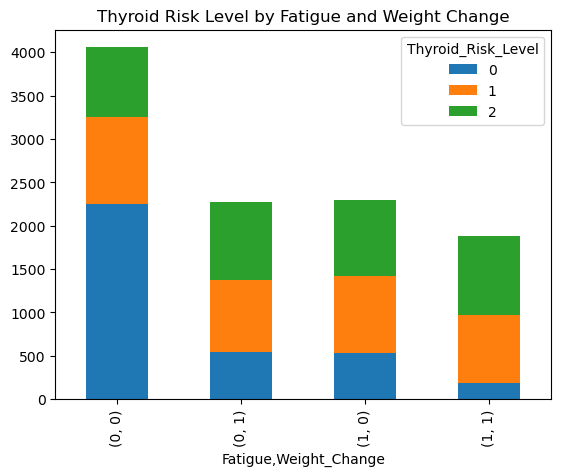

In [18]:
comorbidity_crosstab = pd.crosstab(index=[df['Fatigue'], df['Weight_Change']], columns=df['Thyroid_Risk_Level'])
comorbidity_crosstab.plot(kind='bar', stacked=True)
plt.title('Thyroid Risk Level by Fatigue and Weight Change')
plt.show()

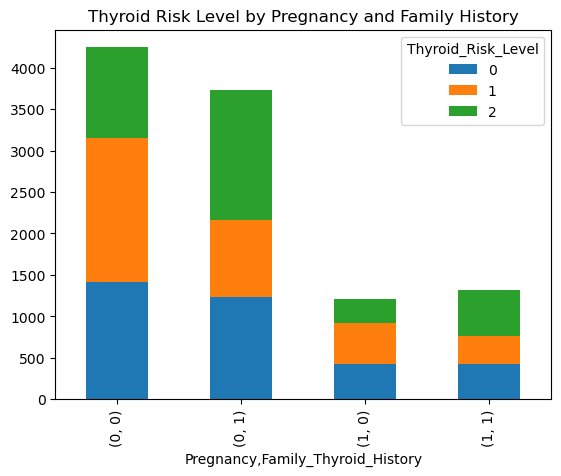

In [19]:
pregnancy_family_crosstab = pd.crosstab(index=[df['Pregnancy'], df['Family_Thyroid_History']], columns=df['Thyroid_Risk_Level'])
pregnancy_family_crosstab.plot(kind='bar', stacked=True)
plt.title('Thyroid Risk Level by Pregnancy and Family History')
plt.show()

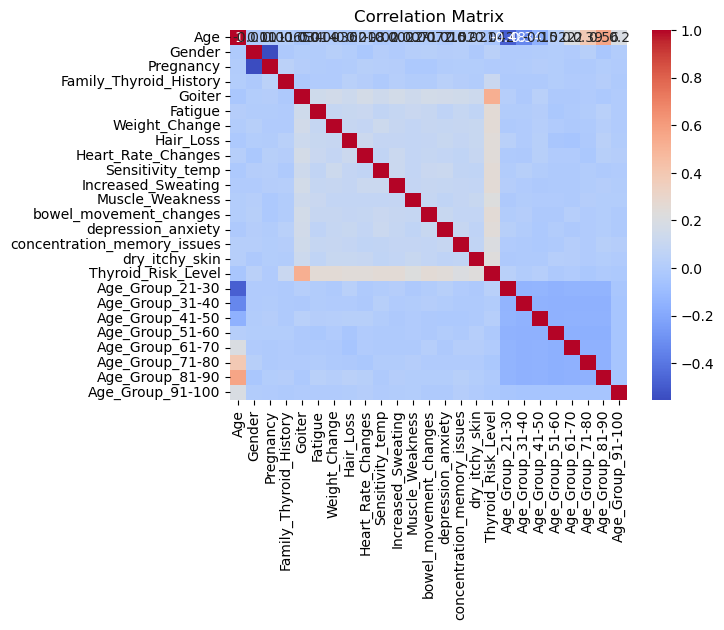

In [20]:
# One-hot encode the 'Age_Group' column 
df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)
corr_df = df.corr()

# Plot a heatmap
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Machine Learning

In [23]:
# Drop Age column
df = df.drop(columns=['Age'])

# Dictionary to store the results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Confusion Matrix': []
}

# Function to evaluate and store model results
def evaluate_and_store_results(model_name, y_test, y_pred, results):
    # Store the results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    results['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))
    results['Confusion Matrix'].append(confusion_matrix(y_test, y_pred).tolist())  # Convert to list to avoid DataFrame issues

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

### Logistic Regression

In [24]:
# Load and prepare the dataset
X = df.drop('Thyroid_Risk_Level', axis=1)
y = df['Thyroid_Risk_Level']

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Logistic Regression', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."


### Decision Trees
- Simple decision tree classifier.

In [25]:
# Fit the model with training set
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Decision Tree Classifier', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"


### Naive Bayes
- Probabilistic classification.

In [26]:
# Fit with training set
model = GaussianNB()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Naive Bayes', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"
2,Naive Bayes,0.577411,0.613990,0.577411,0.538908,"[[1067, 0, 0], [602, 264, 180], [366, 184, 489]]"


### Random Forests

Ensemble of decision trees.

In [27]:
# Fit training set
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Random Forests', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"
2,Naive Bayes,0.577411,0.613990,0.577411,0.538908,"[[1067, 0, 0], [602, 264, 180], [366, 184, 489]]"
3,Random Forests,0.857868,0.857807,0.857868,0.857757,"[[964, 59, 44], [79, 870, 97], [43, 126, 870]]"


### Support Vector Machines (SVM)
- Classification using hyperplanes.

In [28]:
# Fit with train set
model = SVC()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Support Vector Machines', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"
2,Naive Bayes,0.577411,0.613990,0.577411,0.538908,"[[1067, 0, 0], [602, 264, 180], [366, 184, 489]]"
3,Random Forests,0.857868,0.857807,0.857868,0.857757,"[[964, 59, 44], [79, 870, 97], [43, 126, 870]]"
4,Support Vector Machines,0.615165,0.612733,0.615165,0.612379,"[[854, 139, 74], [186, 564, 296], [108, 410, 5..."


### K-Nearest Neighbors (KNN)
- Classification based on proximity.

In [29]:
# Fit with train set
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('K-Nearest Neighbors', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"
2,Naive Bayes,0.577411,0.613990,0.577411,0.538908,"[[1067, 0, 0], [602, 264, 180], [366, 184, 489]]"
3,Random Forests,0.857868,0.857807,0.857868,0.857757,"[[964, 59, 44], [79, 870, 97], [43, 126, 870]]"
4,Support Vector Machines,0.615165,0.612733,0.615165,0.612379,"[[854, 139, 74], [186, 564, 296], [108, 410, 5..."
5,K-Nearest Neighbors,0.705584,0.710447,0.705584,0.698861,"[[942, 82, 43], [187, 719, 140], [207, 269, 563]]"


## Advanced Models

### Gradient Boosting Machines (GBM)
- Ensemble learning method.

In [31]:
# Fit with train set
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Gradient Boosting Machines', y_test, y_pred, results)

# Print the results
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"
2,Naive Bayes,0.577411,0.613990,0.577411,0.538908,"[[1067, 0, 0], [602, 264, 180], [366, 184, 489]]"
3,Random Forests,0.857868,0.857807,0.857868,0.857757,"[[964, 59, 44], [79, 870, 97], [43, 126, 870]]"
4,Support Vector Machines,0.615165,0.612733,0.615165,0.612379,"[[854, 139, 74], [186, 564, 296], [108, 410, 5..."
5,K-Nearest Neighbors,0.705584,0.710447,0.705584,0.698861,"[[942, 82, 43], [187, 719, 140], [207, 269, 563]]"
6,Gradient Boosting Machines,0.725254,0.735005,0.725254,0.722886,"[[914, 130, 23], [156, 761, 129], [111, 317, 6..."


### XGBoost
- Efficient implementation of gradient boosting.

In [33]:
# Fit with train set
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('XGBoost', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"
2,Naive Bayes,0.577411,0.613990,0.577411,0.538908,"[[1067, 0, 0], [602, 264, 180], [366, 184, 489]]"
3,Random Forests,0.857868,0.857807,0.857868,0.857757,"[[964, 59, 44], [79, 870, 97], [43, 126, 870]]"
4,Support Vector Machines,0.615165,0.612733,0.615165,0.612379,"[[854, 139, 74], [186, 564, 296], [108, 410, 5..."
5,K-Nearest Neighbors,0.705584,0.710447,0.705584,0.698861,"[[942, 82, 43], [187, 719, 140], [207, 269, 563]]"
6,Gradient Boosting Machines,0.725254,0.735005,0.725254,0.722886,"[[914, 130, 23], [156, 761, 129], [111, 317, 6..."
7,XGBoost,0.837563,0.837389,0.837563,0.837305,"[[954, 70, 43], [89, 843, 114], [57, 139, 843]]"


### AdaBoost
- Boosting method for classification.

In [34]:
from sklearn.ensemble import AdaBoostClassifier

# Fit with train set
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Predict with test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('AdaBoost', y_test, y_pred, results)
results_df

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"
2,Naive Bayes,0.577411,0.613990,0.577411,0.538908,"[[1067, 0, 0], [602, 264, 180], [366, 184, 489]]"
3,Random Forests,0.857868,0.857807,0.857868,0.857757,"[[964, 59, 44], [79, 870, 97], [43, 126, 870]]"
4,Support Vector Machines,0.615165,0.612733,0.615165,0.612379,"[[854, 139, 74], [186, 564, 296], [108, 410, 5..."
5,K-Nearest Neighbors,0.705584,0.710447,0.705584,0.698861,"[[942, 82, 43], [187, 719, 140], [207, 269, 563]]"
6,Gradient Boosting Machines,0.725254,0.735005,0.725254,0.722886,"[[914, 130, 23], [156, 761, 129], [111, 317, 6..."
7,XGBoost,0.837563,0.837389,0.837563,0.837305,"[[954, 70, 43], [89, 843, 114], [57, 139, 843]]"
8,AdaBoost,0.644670,0.637795,0.644670,0.640261,"[[871, 170, 26], [175, 497, 374], [108, 267, 6..."


### Neural Networks
- Deep learning models for complex patterns.

In [35]:
# Fit train set
model = MLPClassifier(hidden_layer_sizes=(100,))
model.fit(X_train, y_train)

# Predict test set
y_pred = model.predict(X_test)

# Evaluate and store results
results_df = evaluate_and_store_results('Neural Networks', y_test, y_pred, results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"
2,Naive Bayes,0.577411,0.613990,0.577411,0.538908,"[[1067, 0, 0], [602, 264, 180], [366, 184, 489]]"
3,Random Forests,0.857868,0.857807,0.857868,0.857757,"[[964, 59, 44], [79, 870, 97], [43, 126, 870]]"
4,Support Vector Machines,0.615165,0.612733,0.615165,0.612379,"[[854, 139, 74], [186, 564, 296], [108, 410, 5..."
5,K-Nearest Neighbors,0.705584,0.710447,0.705584,0.698861,"[[942, 82, 43], [187, 719, 140], [207, 269, 563]]"
6,Gradient Boosting Machines,0.725254,0.735005,0.725254,0.722886,"[[914, 130, 23], [156, 761, 129], [111, 317, 6..."
7,XGBoost,0.837563,0.837389,0.837563,0.837305,"[[954, 70, 43], [89, 843, 114], [57, 139, 843]]"
8,AdaBoost,0.644670,0.637795,0.644670,0.640261,"[[871, 170, 26], [175, 497, 374], [108, 267, 6..."
9,Neural Networks,0.694162,0.709670,0.694162,0.695312,"[[813, 209, 45], [119, 770, 157], [89, 345, 605]]"


## All Machine Model Results

In [36]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.666244,0.662777,0.666244,0.663723,"[[874, 155, 38], [180, 580, 286], [110, 283, 6..."
1,Decision Tree Classifier,0.830901,0.831826,0.830901,0.831247,"[[914, 97, 56], [71, 843, 132], [48, 129, 862]]"
2,Naive Bayes,0.577411,0.613990,0.577411,0.538908,"[[1067, 0, 0], [602, 264, 180], [366, 184, 489]]"
3,Random Forests,0.857868,0.857807,0.857868,0.857757,"[[964, 59, 44], [79, 870, 97], [43, 126, 870]]"
4,Support Vector Machines,0.615165,0.612733,0.615165,0.612379,"[[854, 139, 74], [186, 564, 296], [108, 410, 5..."
5,K-Nearest Neighbors,0.705584,0.710447,0.705584,0.698861,"[[942, 82, 43], [187, 719, 140], [207, 269, 563]]"
6,Gradient Boosting Machines,0.725254,0.735005,0.725254,0.722886,"[[914, 130, 23], [156, 761, 129], [111, 317, 6..."
7,XGBoost,0.837563,0.837389,0.837563,0.837305,"[[954, 70, 43], [89, 843, 114], [57, 139, 843]]"
8,AdaBoost,0.644670,0.637795,0.644670,0.640261,"[[871, 170, 26], [175, 497, 374], [108, 267, 6..."
9,Neural Networks,0.694162,0.709670,0.694162,0.695312,"[[813, 209, 45], [119, 770, 157], [89, 345, 605]]"
